# WS 06

In [1]:
import gensim
gensim.__version__

'4.3.3'

In [2]:
!pip install --upgrade gensim


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from gensim.models import Word2Vec
from gensim.utils import tokenize
from gensim.parsing.preprocessing import remove_stopwords 

In [4]:
s1 = 'CNN is great. ' 
s2 = 'Python is a good language. ' 
s3 = 'You can learn CNN using Python. '

sents = s1 + s2 + s3  
sents

'CNN is great. Python is a good language. You can learn CNN using Python. '

In [5]:
sents = remove_stopwords(sents)

sents_tk = [list(tokenize(sents, deacc = True))]
sents_tk

[['CNN',
  'great',
  'Python',
  'good',
  'language',
  'You',
  'learn',
  'CNN',
  'Python']]

In [6]:
model = Word2Vec(sents_tk, vector_size=5, window=1, 
                 min_count=1, sg=0, workers=4, epochs=40)

print(model)

Word2Vec<vocab=7, vector_size=5, alpha=0.025>


In [7]:
for index, word in enumerate(model.wv.index_to_key):
    if index == 10:
        break
    print(index, word)

0 Python
1 CNN
2 learn
3 You
4 language
5 good
6 great


In [8]:
model.wv.most_similar('good') 

[('great', 0.93242347240448),
 ('CNN', 0.7743226289749146),
 ('You', 0.7670735120773315),
 ('Python', -0.00010633184865582734),
 ('language', -0.15319672226905823),
 ('learn', -0.6142301559448242)]

In [9]:
try:
    vec_cameroon = model.wv['man']
except KeyError:
    print("This word does not appear in this model")

This word does not appear in this model


In [10]:
pairs = [
    ('good', 'great'),
    ('CNN', 'great'),  
    ('CNN', 'good'),  
    ('learn', 'Python'),
    ('language', 'You')]    

for w1, w2 in pairs:
    print('{:>8}  {:8} {:6.3f}' .format(w1, w2, model.wv.similarity(w1, w2)))

    good  great     0.932
     CNN  great     0.851
     CNN  good      0.774
   learn  Python    0.459
language  You      -0.347


In [11]:
model.save('myword2vec.model')

In [12]:

trained_model = Word2Vec.load('myword2vec.model')
trained_model.wv.most_similar('good') 

[('great', 0.93242347240448),
 ('CNN', 0.7743226289749146),
 ('You', 0.7670735120773315),
 ('Python', -0.00010633184865582734),
 ('language', -0.15319672226905823),
 ('learn', -0.6142301559448242)]

## plot

In [13]:
import numpy as np
import matplotlib.pyplot as plt

labels = np.asarray(model.wv.index_to_key)  
labels.shape

(7,)

In [14]:
print(labels)

['Python' 'CNN' 'learn' 'You' 'language' 'good' 'great']


In [15]:
vectors = np.asarray(model.wv.vectors)
vectors.shape

(7, 5)

In [16]:
print(vectors[0].round(3))

[-0.011  0.005  0.102  0.18  -0.186]


In [17]:
print(vectors.round(3))

[[-0.011  0.005  0.102  0.18  -0.186]
 [-0.142  0.129  0.18  -0.1   -0.075]
 [ 0.148 -0.031 -0.091  0.131 -0.097]
 [-0.036  0.058  0.02  -0.166 -0.189]
 [ 0.146  0.101  0.135  0.015  0.127]
 [-0.068 -0.019  0.115 -0.15  -0.079]
 [-0.15  -0.019  0.191 -0.146 -0.047]]


In [18]:
sents

'CNN great. Python good language. You learn CNN Python.'

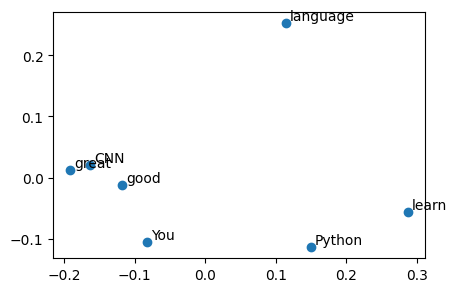

In [19]:
from sklearn.decomposition import PCA

plt.figure(figsize=(4.8, 3.2))

pca = PCA(n_components=2)
result = pca.fit_transform(vectors)

plt.scatter(result[:, 0], result[:, 1])

for i, label in enumerate(labels):
    plt.annotate(label, xy=(result[i, 0]+.005, result[i, 1]+.005))

plt.show()

In [20]:
model.save('myword2vec.model')

In [21]:
trained_model = Word2Vec.load('myword2vec.model')
trained_model.wv.most_similar('good')

[('great', 0.93242347240448),
 ('CNN', 0.7743226289749146),
 ('You', 0.7670735120773315),
 ('Python', -0.00010633184865582734),
 ('language', -0.15319672226905823),
 ('learn', -0.6142301559448242)]